In [75]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
aapl = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
aapl.columns

[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

# Importing Apple data

<Axes: xlabel='Date', ylabel='Close'>

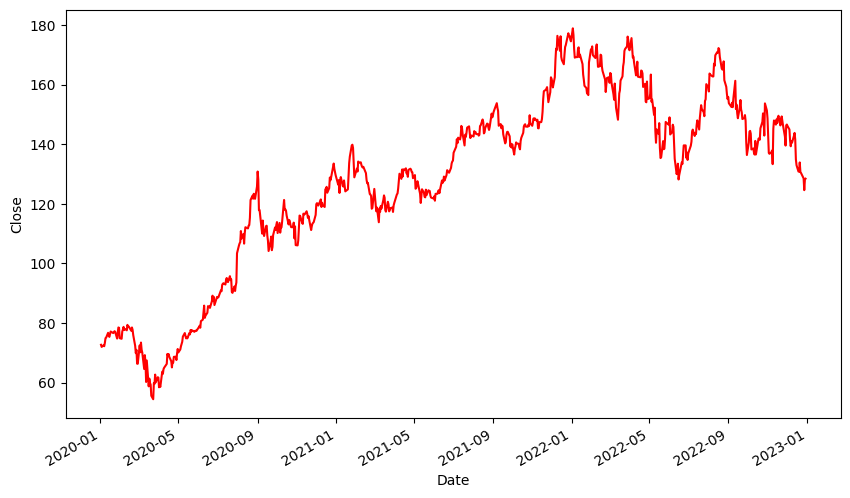

In [68]:
aapl.loc["2020-01-01":"2023-01-01", "Close"].plot(ylabel='Close', color='red', title='', legend=False, figsize=(10, 6))

# Daily return 

In [79]:
aapl["LogReturn"] = np.log(aapl["Close"]).shift(-1) - np.log(aapl["Close"])

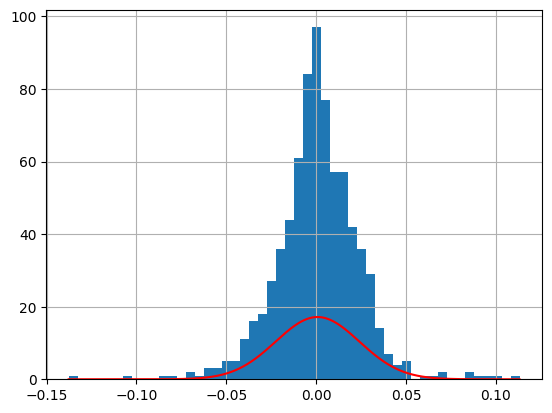

In [91]:
aapl["LogReturn"].hist(bins=50)

mean = aapl["LogReturn"].mean()
sigma = aapl["LogReturn"].std(ddof=1)

x = np.linspace(np.min(aapl["LogReturn"]), np.max(aapl["LogReturn"]), 756)

aapl["pdf"] = norm.pdf(x, mean, sigma)

plt.plot(x, aapl["pdf"], color='red') 
plt.show()

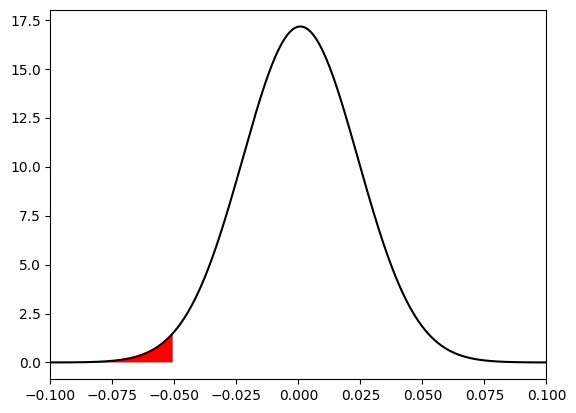

In [124]:

plt.plot(x, aapl["pdf"], color='black') 
plt.fill_between(x=np.arange(np.min(aapl["LogReturn"]), -0.05, 0.001), y2=0, y1= norm.pdf(np.arange(np.min(aapl["LogReturn"]), -0.05, 0.001), mean, sigma), facecolor='red')
plt.xlim(-0.10, 0.10)
plt.show()

In [112]:
print("The probabality to get a daily return loss more than 5% is: ", norm.cdf(-0.05, mean, sigma))

The probabality to get a daily return loss more than 5% is:  0.014538069314571096


## Yearly return (220 days)

In [116]:
mean220 = 220 * mean
sigma220 = np.sqrt(220) * sigma

In [125]:
print("The probabality to get a yearly return loss of more than 40% is: ", round(norm.cdf(-0.4, mean220, sigma220), 2))

The probabality to get a yearly return loss of more than 40% is:  0.05


# Quantiles (inverse of norm.cdf)

In [127]:
print("yearly return drop of a probability of 5% is: ", round(norm.ppf(0.05, mean220, sigma220), 2))

yearly return drop of a probability of 5% is:  -0.4


# Confidence Interval (CI)

A sample mean $\bar{x}$ is a single point or value that provides us with an estimate of the true mean of interest in the population. In some sense, we are not interested in the particular value of the sample mean per se, but rather we are interested in the information it provides us about the population. It provides an estimate of the population parameter of interest; in this case, the mean in the population, $\mu$.

## Central Limit Theorem

if we take many random samples of size nn from any population (even if it's not normal), the distribution of the sample mean $\bar{x}$ will be approximately normal when n is large enough (usually $n\geq 30$).

$\bar{x} = N(\mu, \frac{\sigma}{\sqrt{n}})$ ($\sigma$ is standard deviation of population).

## Z Distribution

### $Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$.
The CI is $\frac{\sigma}{\sqrt{n}} * Z_{\alpha/2} - \bar{x}\leq \mu \leq \frac{\sigma}{\sqrt{n}} * Z_{\alpha/2} + \bar{x}$, And the CL is $P(\frac{\sigma}{\sqrt{n}} * Z_{\alpha/2} - \bar{x}\leq \mu \leq \frac{\sigma}{\sqrt{n}} * Z_{\alpha/2} + \bar{x}) = 1-\alpha$

In [138]:
z_left = norm.ppf(0.05) # alpha / 2 = 0.05
z_right = norm.ppf(0.95) # 1 - alpha / 2 = 0.95
sample_mean = aapl["LogReturn"].mean()
sample_std = aapl["LogReturn"].std(ddof=1) / np.sqrt(aapl.shape[0])
lower_bound = sample_std * z_left - sample_mean
upper_bound = sample_std * z_right + sample_mean
print("95% Confidence Interval is: ", (lower_bound, upper_bound))

95% Confidence Interval is:  (-0.0021446673203676225, 0.002144667320367622)
